In [1]:
import pandas as pd

In [2]:
collection_url = "https://geoserver-portal.aodn.org.au/geoserver/ows?typeName=imos:soop_asf_mt_trajectory_data&SERVICE=WFS&outputFormat=csv&REQUEST=GetFeature&VERSION=1.0.0&CQL_FILTER=(cruise_id%20LIKE%20'v0623')&userId=Guest"

In [6]:
df = pd.read_csv(collection_url,parse_dates=[6]).set_index("TIME")

<Axes: xlabel='TIME'>

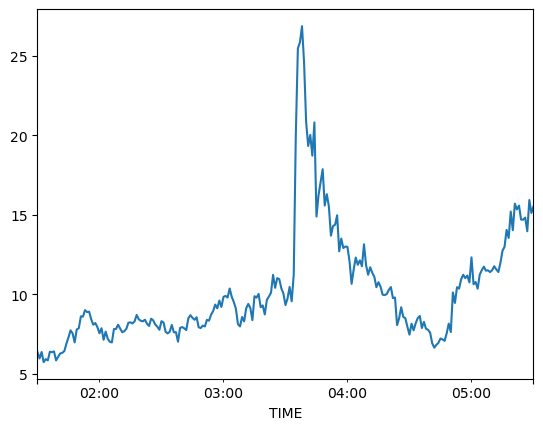

In [20]:
df.loc[slice("2023-10-16 01:30","2023-10-16 05:30")].WSPD_1.plot()

In [9]:
import xarray as xr

In [15]:
#From here: https://thredds.aodn.org.au/thredds/catalog/IMOS/SOOP/SOOP-ASF/VLMJ_Investigator/meteorological_sst_observations/2023/catalog.html
ds = xr.open_dataset("https://thredds.aodn.org.au/thredds/dodsC/IMOS/SOOP/SOOP-ASF/VLMJ_Investigator/meteorological_sst_observations/2023/IMOS_SOOP-ASF_MT_20231016T000000Z_VLMJ_FV01_C-20231017T040121Z.nc")

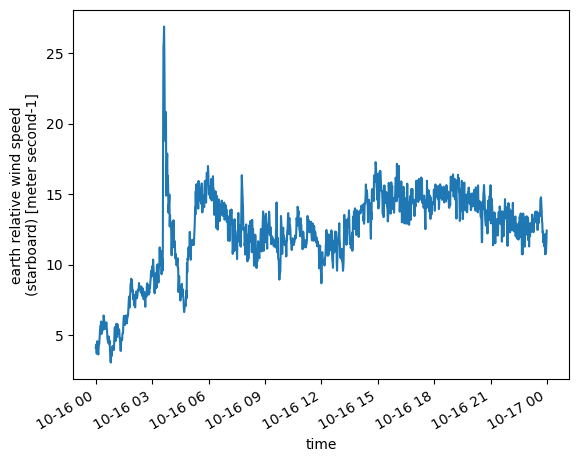

In [16]:
ds.WSPD.plot()

In [25]:
df.sort_values("WSPD_1")[["LONGITUDE","LATITUDE","WSPD_1"]]

,LONGITUDE,LATITUDE,WSPD_1
TIME,,,
2023-10-28 19:40:00,154.3012,-33.0470,0.2161
2023-10-23 22:00:00,156.8401,-34.8071,0.2932
2023-10-23 14:10:00,156.1440,-34.6608,0.2984
2023-10-23 15:07:00,156.2676,-34.6873,0.3447
2023-10-23 15:06:00,156.2654,-34.6869,0.3498
...,...,...,...
2023-10-12 11:33:00,153.1047,-33.2936,23.3764
2023-10-16 03:39:00,154.3233,-35.9063,24.5802
2023-10-16 03:36:00,154.3246,-35.9085,25.4701


In [26]:
ds

<xarray.Dataset>
Dimensions:                        (TIME: 1440, h_num: 20)
Coordinates:
  * TIME                           (TIME) datetime64[ns] 2023-10-16 ... 2023-...
Dimensions without coordinates: h_num
Data variables: (12/68)
    LATITUDE                       (TIME) float32 ...
    LONGITUDE                      (TIME) float32 ...
    PL_HD                          (TIME) float32 ...
    PL_CRS                         (TIME) float32 ...
    PL_SPD                         (TIME) float32 ...
    PL_WDIR                        (TIME) float32 ...
    ...                             ...
    LW_quality_control             (TIME) |S64 ...
    LW_2_quality_control           (TIME) |S64 ...
    RAD_PAR_quality_control        (TIME) |S64 ...
    RAD_PAR_2_quality_control      (TIME) |S64 ...
    KEEL_EXT_quality_control       (TIME) |S64 ...
    RAIN_AMOUNT_2_quality_control  (TIME) |S64 ...
Attributes: (12/37)
    site:                            R/V INVESTIGATOR
    project:                         Integrated Marine Observing System
    conventions:                     IMOS version 1.3
    title:                           Sea surface temperature and meteorologic...
    institution:                     Australian Bureau of Meteorology
    date_created:                    2023-10-17T04:01:21Z
    ...                              ...
    file_version:                    Level 1 - Quality Controlled Data
    file_version_quality_control:    Data in this file has been through the B...
    voyage_number:                   v0623
    DODS.strlen:                     1
    DODS.dimName:                    string1
    DODS_EXTRA.Unlimited_Dimension:  TIME